---
title: Homework 4
jupyter: python3
---


This assignment will continue to use the American Community Survey (ACS) from the US Census.
You will need to refer to the documentation to know what the ACS variable names mean. You can find a copy of the codebook in the [Lab 4 folder on Google Drive](https://drive.google.com/drive/u/0/folders/1jkY0mTxBhwOvvCJE_CJ3LWiOr_9V1ojZ)


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
acs = pd.read_csv("./pums_short.csv.gz")

## Question 1: Working with missing data

### Q1.a

In the previous lab we counted the number of missing values for the `"RNTP"` column using

In [3]:
acs["RNTP"].isna().sum()

np.int64(202728)

Repeat for the `"VALP"` column. (If you want, you can compute both totals simultaneously.)

Print out the total number of rows in the `acs` table. What do you notice about the total number of rows and the sum of the missing values for these two columns?



### Q1.b

Write a single line of code that proves that 100% of observations are missing either the `"VALP"` or `"RNTP"` measurements.


### Q1.c

The `.dropna()` method has a `subset = ['column1', 'column2']` argument that allows you to indicate which columns your want to use to control how rows are dropped from the result.

Create a table called `owners` that only includes households that have non-missing `"VALP"` entries. Print out the number of rows in this table and verify it matches the number of observations with *non-missing* `"VALP"` entries in `acs`. Hint:

In [4]:
#Q1a

#printing the number of missing values
print(acs["VALP"].isna().sum())

#printing the total number of rows in the acs table
print(len(acs))

#The total number of rows is 276632 and the number of missing values is 97644. 
#This means that there are 178988 (276632 - 97644 = 178988) 
#rows that have a value for the "VALP" column.

97644
276632


In [5]:
#Q1b

#bool to prove that 100% of observations are 
#missing either the `"VALP"` or `"RNTP"` measurements.

print((acs["VALP"].isna() | acs["RNTP"].isna()).sum() == len(acs))


#This is a boolean statement that returns True. This means that 100% of the 
#observations are missing either the "VALP" or "RNTP" measurements.

True


In [6]:
hint = pd.Series([True, False, False, True])
~ hint

0    False
1     True
2     True
3    False
dtype: bool

In [7]:
#Q1c

print("The answer from Q1a was 178988. The answer from Q1c is:")

owners = acs.dropna(subset = ["VALP"])
print(len(owners))
pd.Series([True, False, False, True])


The answer from Q1a was 178988. The answer from Q1c is:
178988


0     True
1    False
2    False
3     True
dtype: bool

### Q1.d

Using the `owners` table, what **proportion** of rows are missing `"HINCP"` values?

Find the median value of the non-missing values (hint: built in Panadas methods automatically drop missing values).

Using the `.fillna(VALUE, inplace = TRUE)` method, update the `"HINCP"` column of the `owners` table by making any missing values equal to median of the non-missing values.

Verify by showing that all of the values are not missing for `"HINCP"`.



### Q1.e

Repeat the above steps to create a table `renters` that contains only rows for people who are renting (have non-missing `RNTP` values) and median impute any missing `HINCP` values.

For both `owners` and `renters` compute the following quantities for the "HINCP" column.
- mean
- median
- IQR
- standard deviation

Which group has the higher location values? Which group has more spread? Comment briefly on what this means.



## Question 2: More on distributions

### Q2.a Distributions of number of people in the household

Create a histogram of the number of people in the household (`NP`) for the `acs` data. Use the `bins` argument to create a histogram with 20 bins. Briefly discuss the location, spread, and skew of the distribution.

### Q2.b Summaries of `NP`

Check your answers to the previous question by computing the mean, median, IQR, standard deviation, quantile skewness using the 0.25 and 0.75 quantile, and the coefficient of skewness of the `NP` column.

### Q2.c Comparing conditional distribution of NP for owners and renters

Create a side-by-side boxplot of the number of people in the household for owners and renters. What do you notice about the distributions of the number of people in the household for owners and renters?

### Q2.d Effect size of the difference in means

Compute the effect size of the difference in means of the number of people in the household for owners and renters. Use the formula for Cohen's $d$

$$d = \frac{\bar X_1 - \bar X_2}{S_p}$$

where $\bar X_1$ and $\bar X_2$ are the means of the two groups and $S_p$ is the pooled standard deviation.

Using the following table of effect sizes, how would you interpret the effect size of the difference in means of the number of people in the household for owners and renters?

| Effect size | Interpretation |
|-------------|-----------------|
| (0, 0.2]    | Small           |
| (0.2, 0.5]  | Medium          |
| (0.5, 0.1]  | Large           |
| (1, 2]      | Very large      |



## Question 3: More on means and medians

For this problem, we will investigate some theoretical properties of means and medians.

### Q3.a

We have already seen that the mean is the unique point $\bar X$ that makes $\sum_{i=1}^n (X_i - \bar X) = 0$. While we didn't introduce it as such, it is also the case that $\bar X$ is the point that **minimizes** $\sum_{i=1}^n (X_i - \bar X)^2$, the sum of squared deviations.

Using the `HINCP` column of the `acs` data, demonstrate that the sum of squared deviations from the mean is less than the sum of squared deviations from the median ($\sum_{i=1}^n (X_i - \tilde X)^2$).

Recall that `x**2` is how we square things in Python.

In [8]:
#Q1d

#proportion of rows missing "HINCP" values
print("Proportion of rows missing HINCP values:", (owners["HINCP"].isna().sum() / owners.shape[0]))   
#Proportion of rows missing HINCP values: 0.01331932867007844 (make sure to run all to see this output)
#I have noticed some output issues when running this cell individually.

#median value of the non-missing values
median = owners["HINCP"].median()
print("Median value of the non-missing values: ", median)
#Median value of the non-missing values:  75000.0


#update the "HINCP" column of the owners table
owners["HINCP"].fillna(median, inplace = True)

#verify that all of the values are not missing for "HINCP"
print(owners["HINCP"].isna().sum() == 0) #Should be true to verify that all values are not missing for "HINCP"

Proportion of rows missing HINCP values: 0.01331932867007844
Median value of the non-missing values:  75000.0
True


In [9]:
#Q1e

#Renters table
renters = acs.dropna(subset = ["RNTP"])


#median value of the non-missing values
median = renters["HINCP"].median()
print("RENTERS - Median value of the non-missing values: ", median)

#update the "HINCP" column of the renters table
renters["HINCP"].fillna(median, inplace = True)

#verify that all of the values are not missing for "HINCP"
#print("Should be true to verify no values for HINCP are missing:", renters["HINCP"].isna().sum() == 0) #Should be true to verify that all values are not missing for "HINCP"

#mean value of the non-missing values
mean = renters["HINCP"].mean()
print("RENTERS - Mean value of the non-missing values: ", mean)

#IQR value of the non-missing values
IQR = renters["HINCP"].quantile(0.75) - renters["HINCP"].quantile(0.25)
print("RENTERS - IQR value of the non-missing values: ", IQR)

#standard deviation value of the non-missing values
std = renters["HINCP"].std()
print("RENTERS - Standard deviation value of the non-missing values: ", std)


#print the same 4 values for the owners table
#median value of the non-missing values
median = owners["HINCP"].median()
print("\nOWNERS - Median value of the non-missing values: ", median)

#mean value of the non-missing values
mean = owners["HINCP"].mean()
print("OWNERS - Mean value of the non-missing values: ", mean)

#IQR value of the non-missing values
IQR = owners["HINCP"].quantile(0.75) - owners["HINCP"].quantile(0.25)
print("OWNERS - IQR value of the non-missing values: ", IQR)

#standard deviation value of the non-missing values
std = owners["HINCP"].std()
print("OWNERS - Standard deviation value of the non-missing values: ", std)

#Which group has the higher location values? Which group has more spread? (ANSWER BELOW)

#The renters group has a lower median, mean, IQR, and standard deviation value than the owners group.
#This means that the owners group has higher location values and more spread than the renters group.
#In real world terms, the higher location values and greater spread of the owners group 
# indicates that there is a wider range of income values for owners than renters and that
# the income values for owners are generally higher than the income values for renters.


RENTERS - Median value of the non-missing values:  40000.0
RENTERS - Mean value of the non-missing values:  56607.35456808833
RENTERS - IQR value of the non-missing values:  49600.0
RENTERS - Standard deviation value of the non-missing values:  64594.46491847602

OWNERS - Median value of the non-missing values:  75000.0
OWNERS - Mean value of the non-missing values:  103101.59041946946
OWNERS - IQR value of the non-missing values:  85100.0
OWNERS - Standard deviation value of the non-missing values:  107811.39422510703


Mean:  2.208764712686891
Median:  2.0
IQR:  2.0
Standard Deviation:  1.5263892280571307
Quantile Skewness:  0.0
Coefficient of Skewness:  1.1293427823868294


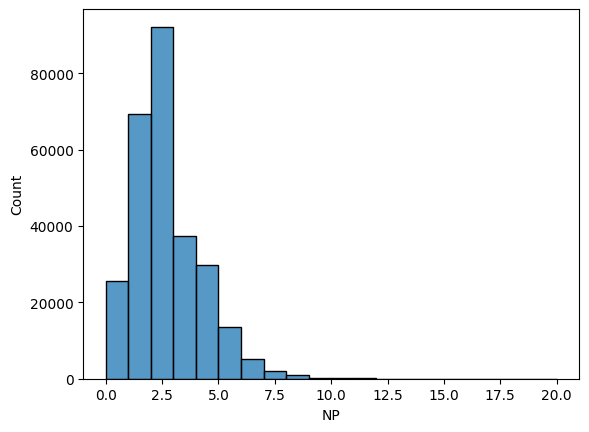

In [10]:
#Q2a

sb.histplot(acs["NP"], bins = 20)

#The histogram of the number of people in the household (NP) for the acs data is unimodal and right-skewed.
#The distribution is centered around roughly 2 people in the household and has a spread that thins out 
# drastically as the number of people in the household increases past 5.

#Q2b

#mean
mean = acs["NP"].mean()
print("Mean: ", mean)

#median
median = acs["NP"].median()
print("Median: ", median)

#IQR
IQR = acs["NP"].quantile(0.75) - acs["NP"].quantile(0.25)
print("IQR: ", IQR)

#standard deviation
std = acs["NP"].std()
print("Standard Deviation: ", std)

#quantile skewness
#(Q3 - Q2) - (Q2 - Q1) / (Q3 - Q1)
Q1 = acs["NP"].quantile(0.25)
Q2 = acs["NP"].quantile(0.5)
Q3 = acs["NP"].quantile(0.75)
quantile_skewness = ((Q3 - Q2) - (Q2 - Q1)) / (Q3 - Q1)
print("Quantile Skewness: ", quantile_skewness)

#coefficient of skewness
skewness = acs["NP"].skew()
print("Coefficient of Skewness: ", skewness)




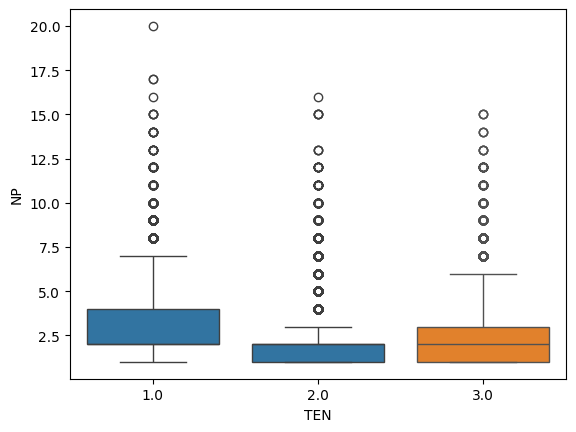

In [11]:
#Q2c


#Create a side-by-side boxplot of the number of people in the household for owners and renters. 
# What do you notice about the distributions of the number of people in the household for owners and renters?

#owners boxplot (not displaying this)
sb.boxplot(x = "TEN", y = "NP", data = owners)

#renters boxplot (not displaying this)
sb.boxplot(x = "TEN", y = "NP", data = renters)
plt.show()

#Among owners, the number of people in a house is visibly higher than renters. They have a higher Q1, Q3, and median value.
#The spread of the number of people in the household for owners is also slightly greater than renters. 



In [12]:

#Q2d

#mean of owners
mean_owners = owners["NP"].mean()

#mean of renters
mean_renters = renters["NP"].mean()

#standard deviation of owners
std_owners = owners["NP"].std()

#standard deviation of renters
std_renters = renters["NP"].std()

#pooled standard deviation
pooled_std = np.sqrt((std_owners ** 2 + std_renters ** 2) / 2)

#effect size
effect_size = (mean_owners - mean_renters) / pooled_std

print("Effect Size: ", effect_size)

#The effect size of the difference in means of the number of people in the household for owners and renters is 0.20166.

#The effect size of 0.20166 falls within the range of (0.2, 0.5] which is considered a medium effect size.
#A medium effect size indicates that the difference in means of the number 
#of people in the household for owners and renters is moderate.


Effect Size:  0.2016556058858045


In [14]:
#Q3a

#sum of squared deviations from the mean

mean = acs["HINCP"].mean()

sum_squared_deviations_mean = ((acs["HINCP"] - mean) ** 2).sum()

#sum of squared deviations from the median
median = acs["HINCP"].median()

sum_squared_deviations_median = ((acs["HINCP"] - median) ** 2).sum()

print("Sum of squared deviations from the mean: ", sum_squared_deviations_mean)

print("Sum of squared deviations from the median: ", sum_squared_deviations_median)

#The sum of squared deviations from the mean is less than the sum of squared deviations from the median.

Sum of squared deviations from the mean:  2514930676893640.5
Sum of squared deviations from the median:  2693213854216370.0


### Q3.b

Now, using $\bar X$ and $\tilde X$, compute the **sum of absolute distances**, $\sum_{i=1}^n | X_i - \bar X |$ and $\sum_{i=1}^n |X_i - \tilde X|$. Recall the `.abs()` method can compute the absolute value of a series.

In [16]:
#Q3b

#sum of absolute distances from the mean
sum_absolute_distances_mean = (acs["HINCP"] - mean).abs().sum()

#sum of absolute distances from the median
sum_absolute_distances_median = (acs["HINCP"] - median).abs().sum()

print("Sum of absolute distances from the mean: ", sum_absolute_distances_mean)
print("Sum of absolute distances from the median: ", sum_absolute_distances_median)

'''While we are not rising to the level of a mathematical proof, what do these result suggest 
about which type of measure of location would minimize the sum of absolute differences?
'''


Sum of absolute distances from the mean:  15613409566.75057
Sum of absolute distances from the median:  14508223606.0


### Q3.c

While we are not rising to the level of a mathematical proof, what do these result suggest about which type of measure of location would minimize the sum of absolute differences?


In [ ]:
#Q3c

#The sum of absolute distances from the mean is 15613409566.75057 and that of the median is 14508223606.0
#The sum of absolute distances from the median is less than the sum of absolute distances from the mean.
#This suggests that the median would minimize the sum of absolute differences.